# sklearn.ensemble.GradientBoostingClassifier
* class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0

In [28]:
import pandas as pd



def get_human_dataset() :

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    featuer_name_df = pd.read_csv("./UCI HAR Dataset/features.txt", sep="\s+",
                              header=None, names=["column_index", "column_name"])


    # 중복된 피처명을 수정하는 get_new_feature_name_df() 를 이용, 신규 피처명 DF 생성
    new_feature_name_df = get_new_feature_name_df(featuer_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    featuer_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스스 피처 데이터를 DF로 로딩, 컬럼명은 feature_name 적용
    X_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt",
                          sep="\s+", names=featuer_name)
    X_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt",
                          sep="\s+", names=featuer_name)

    # 학습 레이블과 테스트 레이블 데이터를 DF로 로딩하고 컬럼명은 action으로 부여
    # "\s+" 데이터 사이 간격 공백으로 구분
    y_train = pd.read_csv("./UCI HAR Dataset/train/y_train.txt",
                          sep="\s+", header=None, names=["action"])
    y_test = pd.read_csv("./UCI HAR Dataset/test/y_test.txt",
                          sep="\s+", header=None, names=["action"])

    # 로드된 학습/테스트용 DF를 모두 반환
    return X_train, X_test, y_train, y_test


def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby("column_name").cumcount(),
                                  columns=["dup_cnt"])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how="outer")
    new_feature_name_df["column_name"] = new_feature_name_df[["column_name", "dup_cnt"]].apply(lambda x : x[0]+"_"+str(x[1])
                                                                                        if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(["index"], axis=1)
    return new_feature_name_df

In [24]:
featuer_name_df = pd.read_csv("./UCI HAR Dataset/features.txt", sep="\s+",
                              header=None, names=["column_index", "column_name"])
print(featuer_name_df)

     column_index                           column_name
0               1                     tBodyAcc-mean()-X
1               2                     tBodyAcc-mean()-Y
2               3                     tBodyAcc-mean()-Z
3               4                      tBodyAcc-std()-X
4               5                      tBodyAcc-std()-Y
..            ...                                   ...
556           557      angle(tBodyGyroMean,gravityMean)
557           558  angle(tBodyGyroJerkMean,gravityMean)
558           559                  angle(X,gravityMean)
559           560                  angle(Y,gravityMean)
560           561                  angle(Z,gravityMean)

[561 rows x 2 columns]


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 {0:.4f}'.format(gb_accuracy))
print(f'GBM 정확도 {gb_accuracy:.4f}')
print('GBM 수행시간: {0:.1f} 초'.format(time.time() - start_time))

KeyboardInterrupt: 

#### class xgboost.XGBRegressor(*, objective='reg:squarederror', **kwargs)
Parameters

-   **n_estimators**  ([_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")) – Number of gradient boosted trees. Equivalent to number of boosting rounds.
    
-   **max_depth**  (_Optional__[_[_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")_]_) – Maximum tree depth for base learners.
    
-   **learning_rate**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Boosting learning rate (xgb's "eta")
    
-   **verbosity**  (_Optional__[_[_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")_]_) – The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    
-   **objective**  ([_Union_](https://docs.python.org/3.6/library/typing.html#typing.Union "(in Python v3.6)")_[_[_str_](https://docs.python.org/3.6/library/stdtypes.html#str "(in Python v3.6)")_,_ [_Callable_](https://docs.python.org/3.6/library/typing.html#typing.Callable "(in Python v3.6)")_[__[_[_numpy.ndarray_](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray "(in NumPy v1.22)")_,_ [_numpy.ndarray_](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray "(in NumPy v1.22)")_]__,_ [_Tuple_](https://docs.python.org/3.6/library/typing.html#typing.Tuple "(in Python v3.6)")_[_[_numpy.ndarray_](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray "(in NumPy v1.22)")_,_ [_numpy.ndarray_](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray "(in NumPy v1.22)")_]__]__,_ _NoneType__]_) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).
    
-   **booster**  (_Optional__[_[_str_](https://docs.python.org/3.6/library/stdtypes.html#str "(in Python v3.6)")_]_) – Specify which booster to use: gbtree, gblinear or dart.
    
-   **tree_method**  (_Optional__[_[_str_](https://docs.python.org/3.6/library/stdtypes.html#str "(in Python v3.6)")_]_) – Specify which tree method to use. Default to auto. If this parameter is set to default, XGBoost will choose the most conservative option available. It's recommended to study this option from the parameters document:  [https://xgboost.readthedocs.io/en/latest/treemethod.html](https://xgboost.readthedocs.io/en/latest/treemethod.html).
    
-   **n_jobs**  (_Optional__[_[_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")_]_) – Number of parallel threads used to run xgboost. When used with other Scikit-Learn algorithms like grid search, you may choose which algorithm to parallelize and balance the threads. Creating thread contention will significantly slow down both algorithms.
    
-   **gamma**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Minimum loss reduction required to make a further partition on a leaf node of the tree.
    
-   **min_child_weight**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Minimum sum of instance weight(hessian) needed in a child.
    
-   **max_delta_step**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Maximum delta step we allow each tree's weight estimation to be.
    
-   **subsample**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Subsample ratio of the training instance.
    
-   **colsample_bytree**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Subsample ratio of columns when constructing each tree.
    
-   **colsample_bylevel**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Subsample ratio of columns for each level.
    
-   **colsample_bynode**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Subsample ratio of columns for each split.
    
-   **reg_alpha**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – L1 regularization term on weights (xgb's alpha).
    
-   **reg_lambda**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – L2 regularization term on weights (xgb's lambda).
    
-   **scale_pos_weight**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Balancing of positive and negative weights.
    
-   **base_score**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – The initial prediction score of all instances, global bias.
    
-   **random_state**  (_Optional__[__Union__[_[_numpy.random.RandomState_](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "(in NumPy v1.22)")_,_ [_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")_]__]_) –

In [46]:
import xgboost as xgb
from xgboost import plot_importace
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from xgboost import XGB 

import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_labels = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df['target'] = y_labels

cancer_df.head(3)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
X_train, X_test, y_train, y_test = 

In [ ]:
a_dict = {"키움증권" : 5000, "카카오" : 3000, "네이버" : 2000}
ee_bool = True
while ee_bool:
    a_dict['키움증권'] = a_dict['키움증권'] + 1000

    if a_dict['키움증권'] == 10000:
        a_dict.update({"이베스트증권" : 5000})
        break

print(a_dict)

In [33]:
s = 'coffee'
n = 5

print(f'저는 {s}를 좋아합니다. 하루 {n}잔 마셔요')

저는 coffee를 좋아합니다. 하루 5잔 마셔요


In [45]:
pi = 3.1416

print(f'소수점 두자리: {pi: 12.2f}')

소수점 두자리:         3.14


In [47]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0


In [49]:
from sklearn.datasets import load_iris
iris = load_iris()
for i in range(len(iris.target)):
    print('Example %d: lable %s, features %s' %(i, iris.target[i], iris.data[i]))

Example 0: lable 0, features [5.1 3.5 1.4 0.2]
Example 1: lable 0, features [4.9 3.  1.4 0.2]
Example 2: lable 0, features [4.7 3.2 1.3 0.2]
Example 3: lable 0, features [4.6 3.1 1.5 0.2]
Example 4: lable 0, features [5.  3.6 1.4 0.2]
Example 5: lable 0, features [5.4 3.9 1.7 0.4]
Example 6: lable 0, features [4.6 3.4 1.4 0.3]
Example 7: lable 0, features [5.  3.4 1.5 0.2]
Example 8: lable 0, features [4.4 2.9 1.4 0.2]
Example 9: lable 0, features [4.9 3.1 1.5 0.1]
Example 10: lable 0, features [5.4 3.7 1.5 0.2]
Example 11: lable 0, features [4.8 3.4 1.6 0.2]
Example 12: lable 0, features [4.8 3.  1.4 0.1]
Example 13: lable 0, features [4.3 3.  1.1 0.1]
Example 14: lable 0, features [5.8 4.  1.2 0.2]
Example 15: lable 0, features [5.7 4.4 1.5 0.4]
Example 16: lable 0, features [5.4 3.9 1.3 0.4]
Example 17: lable 0, features [5.1 3.5 1.4 0.3]
Example 18: lable 0, features [5.7 3.8 1.7 0.3]
Example 19: lable 0, features [5.1 3.8 1.5 0.3]
Example 20: lable 0, features [5.4 3.4 1.7 0.2]
Ex

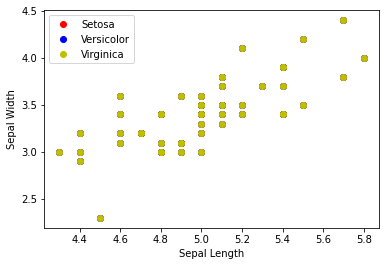

In [51]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
sepal = iris.data[:, 0:2]
kind = iris.target
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.plot(sepal[kind == 0][:, 0], sepal[kind == 0][:, 1], 
                        "ro", label = 'Setosa')
plt.plot(sepal[kind == 0][:, 0], sepal[kind == 0][:, 1], 
                        "bo", label = 'Versicolor')
plt.plot(sepal[kind == 0][:, 0], sepal[kind == 0][:, 1], 
                        "yo", label = 'Virginica')

plt.legend()


In [53]:
from sklearn.datasets import load_iris

iris = load_iris()

from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [54]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
scores

0.9666666666666667

In [60]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X, y)

classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

x_new = [[3,4,5,2], [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


In [61]:
from sklearn.datasets import make_regression,make_classification

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=100,n_features=10,n_informative=2)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# it takes a list of tuples as parameter
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
	])

# use the pipeline object as you would
# a regular classifier
pipeline.fit(X_train,y_train)


y_preds = pipeline.predict(X_test)

accuracy_score(y_test,y_preds)

0.9090909090909091

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups

cats = ['alt.atheism', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)
newsgroups_test = fetch_20newsgroups(subset='test', categories=cats)

X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# this calculates a vector of term frequencies for 
# each document
vect = CountVectorizer()

# this normalizes each term frequency by the 
# number of documents having that term
tfidf = TfidfTransformer()

# this is a linear SVM classifier
clf = LinearSVC()

pipeline = Pipeline([
    ('vect',vect),
    ('tfidf',tfidf),
    ('clf',clf)
])

scores = cross_val_score(pipeline,X_train,y_train,cv=3,scoring='f1_micro')

scores

scores.mean()

# now train and predict test instances
pipeline.fit(X_train,y_train)
y_preds = pipeline.predict(X_test)

# calculate f1
f1_score(y_test, y_preds, average='micro')

KeyboardInterrupt: 

In [22]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

cancer=load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.33, random_state=1)

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [24]:
poly=PolynomialFeatures(degree=2,include_bias=False)
base_model=LinearRegression()
pipe=Pipeline([('poly',poly),
               ('base_model',base_model)])

In [25]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('base_model', LinearRegression())])

In [26]:
print('학습 평가 : ', pipe.score(X_train, y_train))
print('테스트 평가 : ', pipe.score(X_test, y_test))

학습 평가 :  0.6374898647317722
테스트 평가 :  0.2620821087031828
